In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px

In [3]:
import plotly.graph_objects as go

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
from statsmodels.tsa.arima_model import ARIMA

In [7]:
import statsmodels.api as sm

In [8]:
data = pd.read_csv("Website.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [9]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


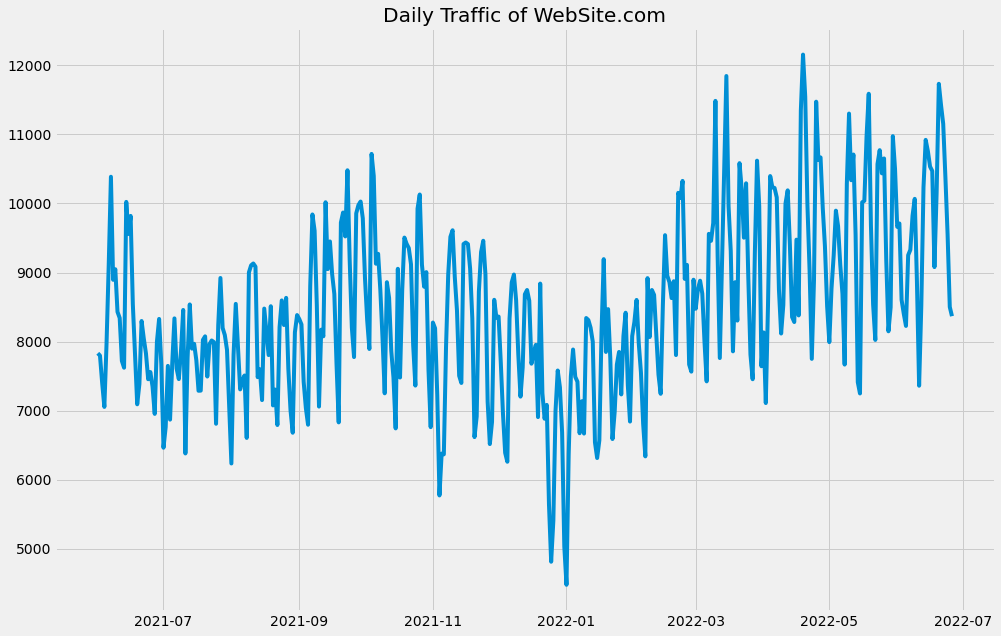

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of WebSite.com")
plt.show()

<Figure size 432x288 with 0 Axes>

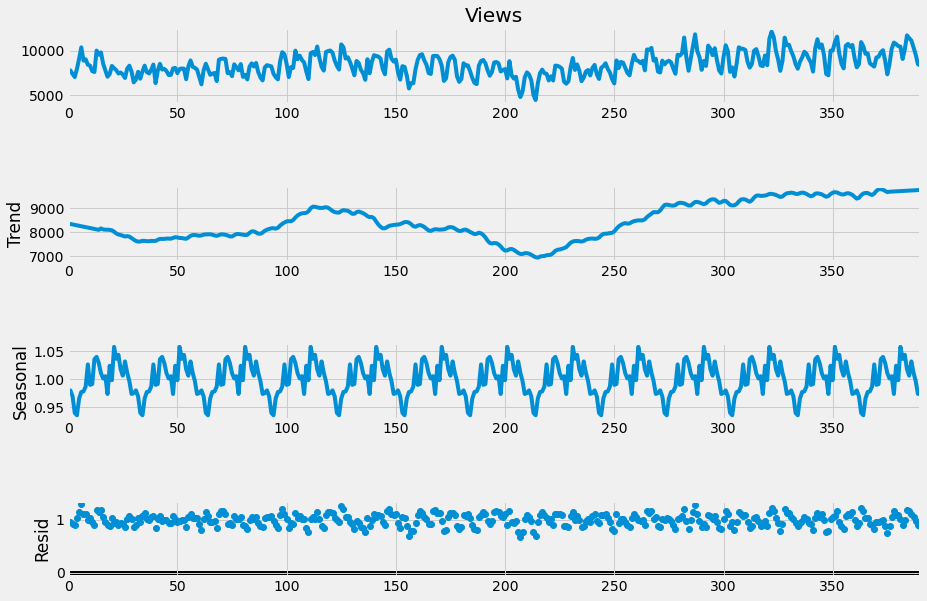

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Views"], model='multiplicative',extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

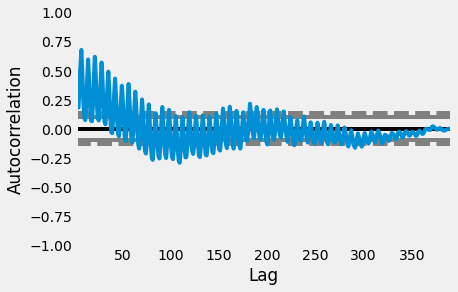

In [12]:
pd.plotting.autocorrelation_plot(data["Views"])

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


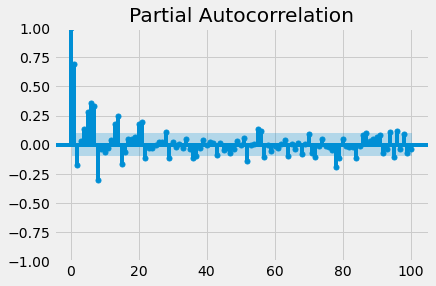

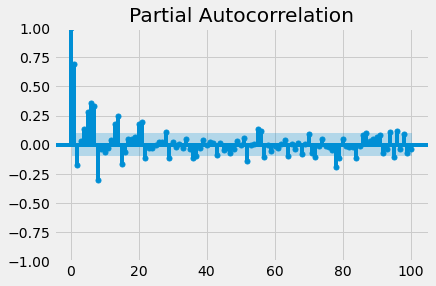

In [13]:
plot_pacf(data["Views"], lags = 100)

In [15]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())


C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.467
Date:                            Fri, 31 Mar 2023   AIC                           6228.933
Time:                                    23:53:54   BIC                           6287.957
Sample:                                         0   HQIC                          6252.359
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7785      0.134      5.790      0.000       0.515       1.042
ar.L2         -0.8003      0.134   

In [18]:
predictions=model.predict(len(data),len(data)+50)
print(predictions)

391     9877.390741
392    10795.539039
393    10760.027140
394     9859.469163
395     8768.340243
396     8220.386498
397     8934.781852
398     9691.221147
399    10276.023043
400    10623.217947
401     9846.080910
402     9358.619001
403     9044.210850
404     9088.171287
405    10544.303967
406    11004.539945
407    10889.086614
408    10073.663141
409     9443.450824
410     8634.197490
411     9188.860108
412    10400.395571
413    10595.944638
414    10784.074228
415    10258.259946
416     9450.516229
417     9052.232545
418     9181.449413
419     9900.238884
420    10226.056903
421    10711.820877
422     9893.199616
423     9542.918529
424     9075.749724
425     8834.478515
426    10144.241610
427    10840.511772
428    10898.827148
429    10402.301196
430     9448.255097
431     8701.545390
432     8732.720077
433    10068.060242
434    10505.394196
435    10833.152585
436    10476.852952
437     9332.115091
438     9183.498204
439     9370.223284
440    10305.766357


<AxesSubplot:>

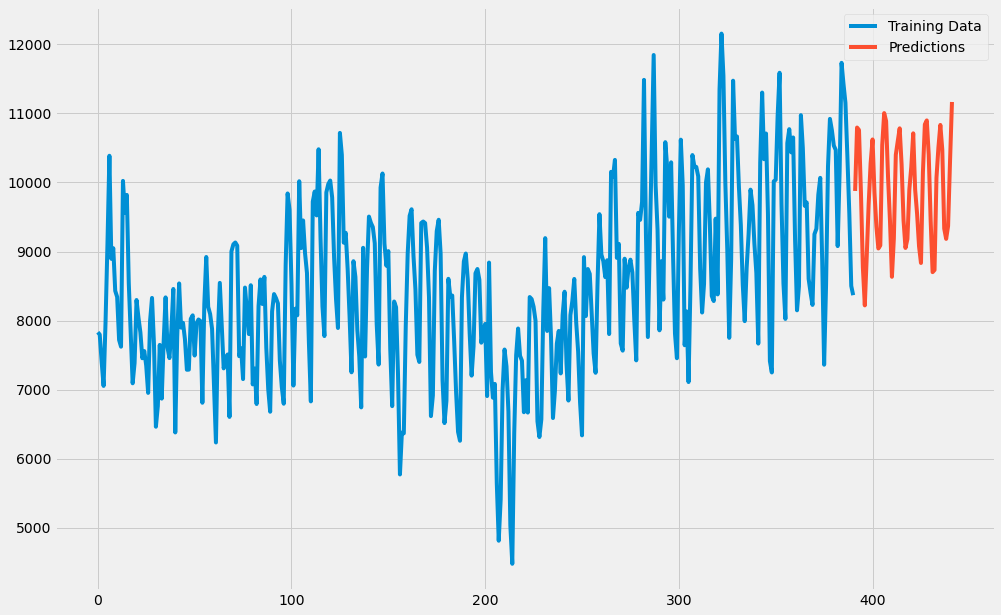

In [17]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")1